In [19]:
import tensorflow as tf  # deep learning library. Tensors are just multi-dimensional arrays

mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

model.fit(x_train, y_train, epochs=3)  # train the model

val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4608 - accuracy: 0.8725
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1117 - accuracy: 0.9659
Epoch 3/3
313/313 [==============================] - 1s 1ms/step - loss: 0.0900 - accuracy: 0.9711
0.09001585841178894
0.9710999727249146


In [23]:
model.save('num_reader.model')
new_model=tf.keras.models.load_model('num_reader.model')

INFO:tensorflow:Assets written to: num_reader.model/assets


In [24]:
predictions=new_model.predict([x_test])

In [25]:
print(predictions)

[[2.8594568e-08 7.2491707e-07 6.7571477e-06 ... 9.9949598e-01
  1.2106120e-06 1.0424983e-05]
 [4.1257442e-07 3.8029782e-05 9.9994874e-01 ... 2.8474625e-09
  2.0358195e-06 1.1426906e-10]
 [2.0188588e-06 9.9928099e-01 2.1952270e-05 ... 2.4610729e-04
  3.7377881e-04 2.1896050e-05]
 ...
 [2.3394371e-09 2.0490170e-07 1.9634848e-08 ... 2.5141526e-05
  3.9028942e-06 1.6470754e-03]
 [4.6502561e-07 2.5565068e-06 1.9254712e-08 ... 6.0579291e-06
  1.5903253e-03 5.4506572e-08]
 [1.5637699e-05 9.6503925e-08 1.0652509e-05 ... 2.9447347e-09
  1.1967079e-06 1.0805886e-07]]


3


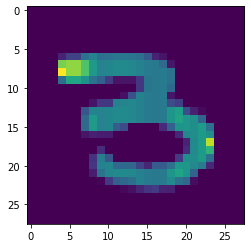

In [30]:
import numpy as np
print(np.argmax(predictions[51])) 
plt.imshow(x_test[51])
plt.show()